In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/1a) Cleaned_logistics.csv")
df

,Shipment_ID,Order_ID,Customer_Name,Source_City,Destination_City,Shipment_Date,Delivery_Date,Transport_Mode,Weight_kg,Distance_km,Vendor,Cost,Selling_Price,Delivery_Status,Damage_Flag,Return_Reason,Driver_Rating,Vehicle_Type,Fuel_Consumption_Litres,Delivery_Time_Calc
0,10001,12270,Aisha,Kolkata,Hyderabad,2022-11-29,2022-12-10,Road,25.0,100.0,Unknown,500.0,1200.0,In Transit,No Damage,Wrong Item,3.0,Mini Van,30.0,11.0
1,10002,5860,Unknown,Kolkata,Unknown,2021-02-02,2022-02-01,Road,15.0,200.0,Unknown,1500.0,300.0,Cancelled,No Damage,Late,3.0,Unknown,30.0,364.0
2,10003,10390,Unknown,Kolkata,Bangalore,2023-05-01,2022-12-24,Unknown,15.0,50.0,Unknown,1500.0,1200.0,In Transit,Unknown,Late,3.0,Bike,25.0,272.0
3,10004,10191,Unknown,Hyderabad,Delhi,2022-09-01,2022-09-20,Sea,30.0,200.0,Unknown,800.0,1200.0,Delivered,Unknown,Late,3.0,Bike,10.0,19.0
4,10005,10734,Unknown,Unknown,Bangalore,2022-10-29,2022-02-11,Unknown,5.0,400.0,DHL,500.0,1600.0,Unknown,Unknown,Not Returned,4.0,Unknown,30.0,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,9427,Unknown,Unknown,Coimbatore,2021-07-06,2021-01-03,Road,15.0,400.0,FedEx,500.0,1200.0,In Transit,Unknown,Damaged,1.0,Unknown,10.0,272.0
4996,14997,11135,Sita,Kolkata,Unknown,2023-04-06,2023-05-04,Road,15.0,100.0,ABC Logistics,800.0,300.0,Cancelled,Damaged,Wrong Item,5.0,Bike,10.0,28.0
4997,14998,10573,Unknown,Bangalore,Unknown,2023-01-09,2022-07-31,Rail,5.0,20.0,ABC Logistics,100.0,1200.0,In Transit,Damaged,Damaged,4.0,Truck,15.0,272.0
4998,14999,9131,John,Kolkata,Coimbatore,2022-07-08,2021-08-10,Sea,5.0,400.0,ABC Logistics,1500.0,1200.0,Returned,No Damage,Not Returned,2.0,Mini Van,20.0,272.0


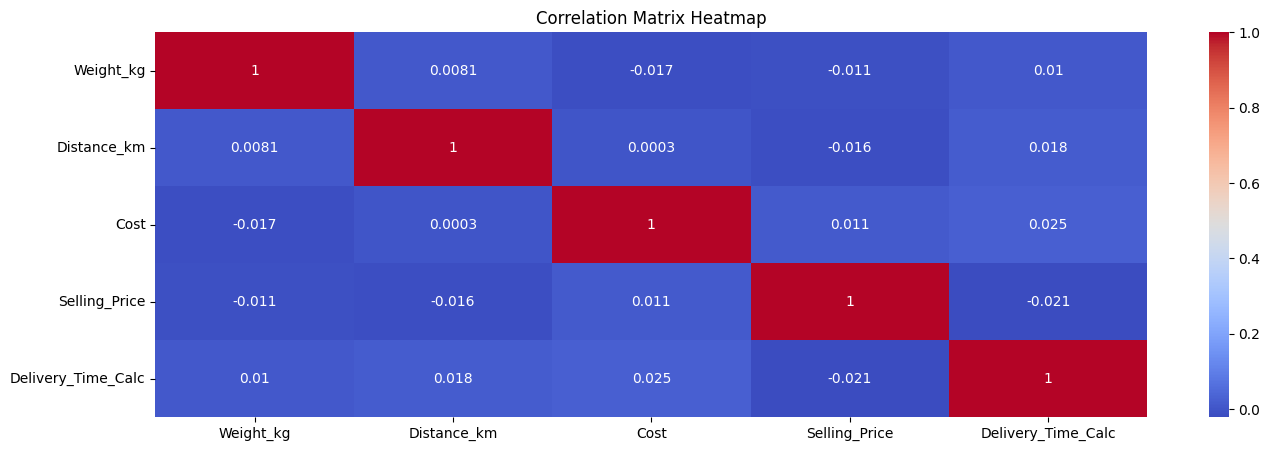

In [7]:
# Correlation matrix
n = df[['Weight_kg', 'Distance_km', 'Cost', 'Selling_Price', 'Delivery_Time_Calc']]
corr = n.corr()
plt.figure(figsize=(16, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

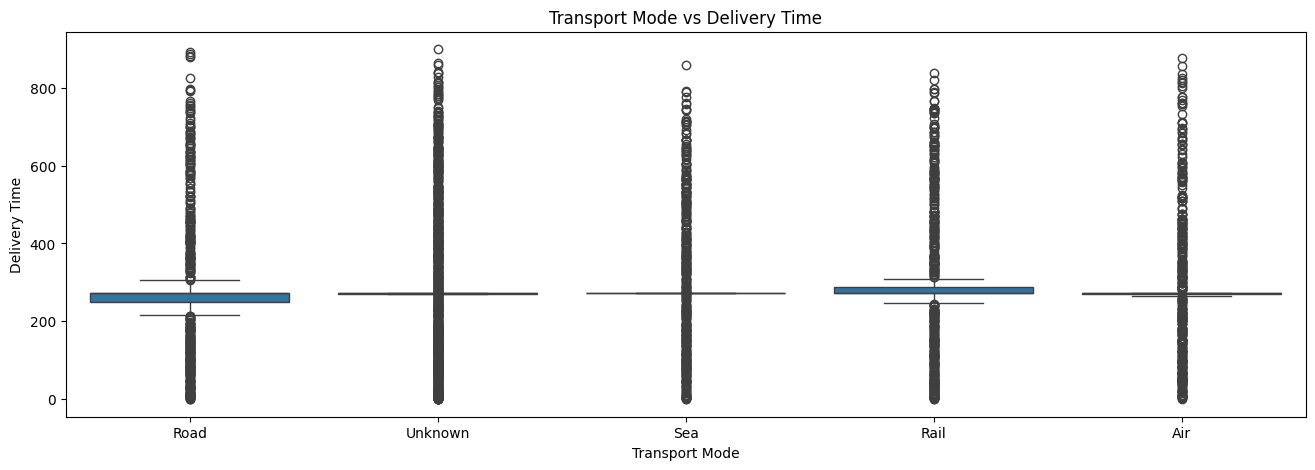

In [8]:
# Transport Mode vs Delivery Time.
plt.figure(figsize=(16, 5))
sns.boxplot(x='Transport_Mode', y='Delivery_Time_Calc',data=df)
plt.title("Transport Mode vs Delivery Time")
plt.xlabel("Transport Mode")
plt.ylabel("Delivery Time")
plt.show()


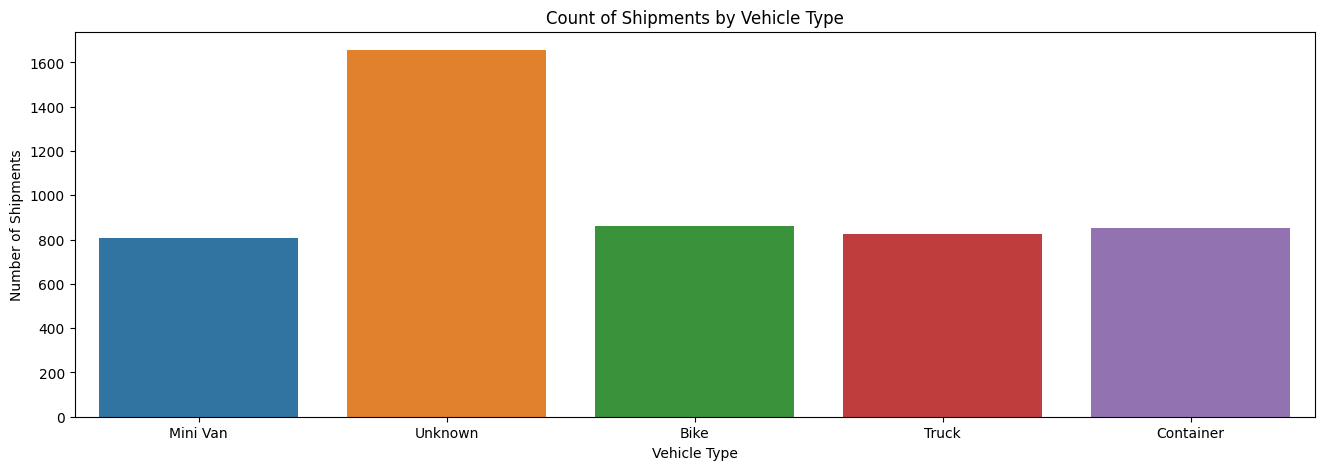

In [15]:
# Vehicle Types.
plt.figure(figsize=(16, 5))
sns.countplot(x='Vehicle_Type', data=df,hue = "Vehicle_Type")
plt.title("Count of Shipments by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Shipments")
plt.show()

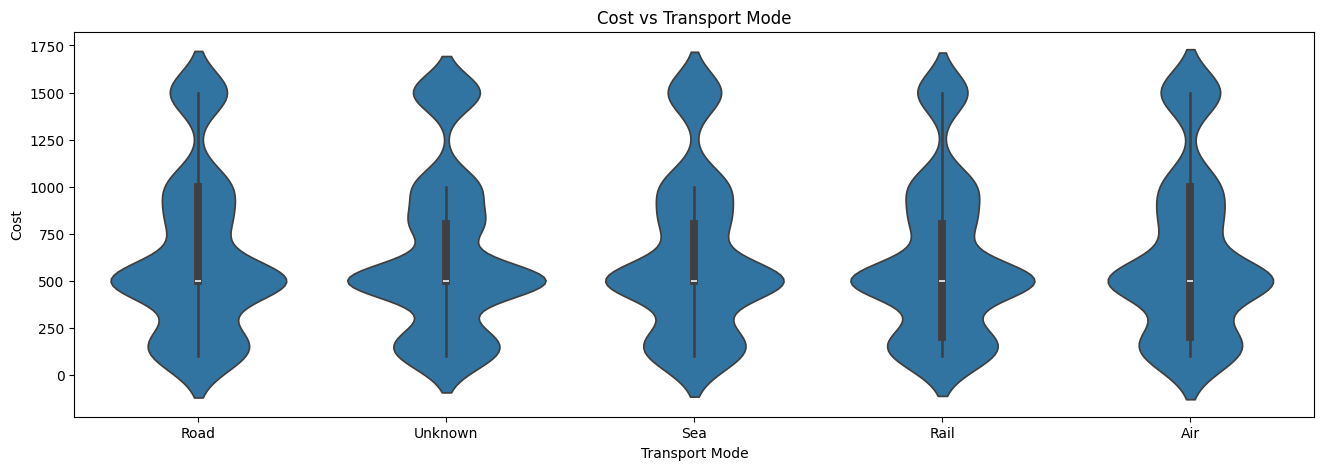

In [22]:
# Cost vs Transport Mode.
plt.figure(figsize=(16, 5))
sns.violinplot( x='Transport_Mode',y='Cost',data=df)
plt.title("Cost vs Transport Mode")
plt.xlabel("Transport Mode")
plt.ylabel("Cost")
plt.show()

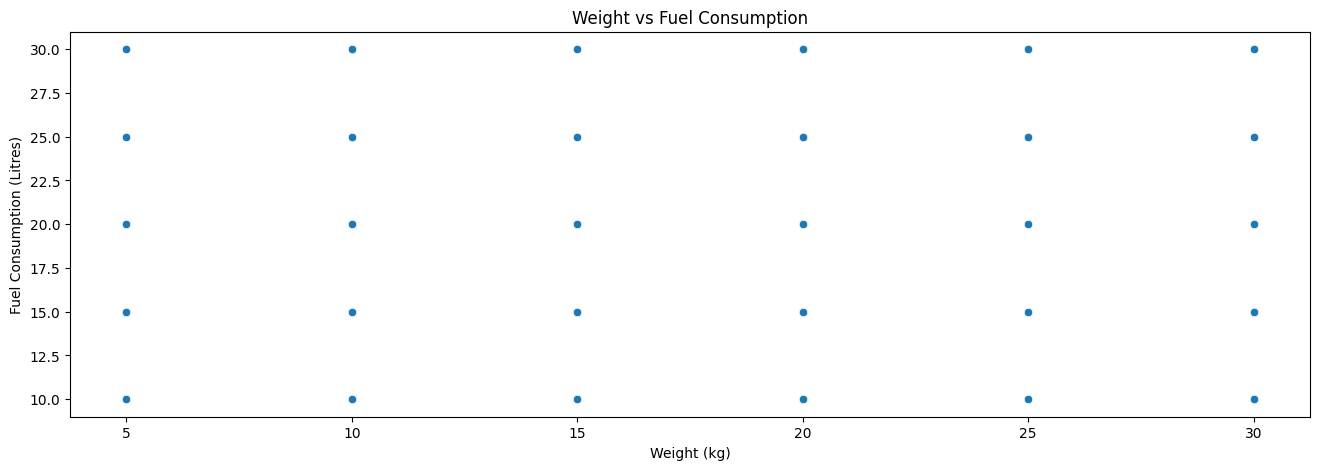

In [23]:
# Weight vs Fuel Consumption.

plt.figure(figsize=(16, 5))
sns.scatterplot(
    x='Weight_kg',
    y='Fuel_Consumption_Litres',
    data=df
)
plt.title("Weight vs Fuel Consumption")
plt.xlabel("Weight (kg)")
plt.ylabel("Fuel Consumption (Litres)")
plt.show()

/tmp/ipython-input-1395719574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source_City', y='Profit', data=city_profit, palette='viridis')


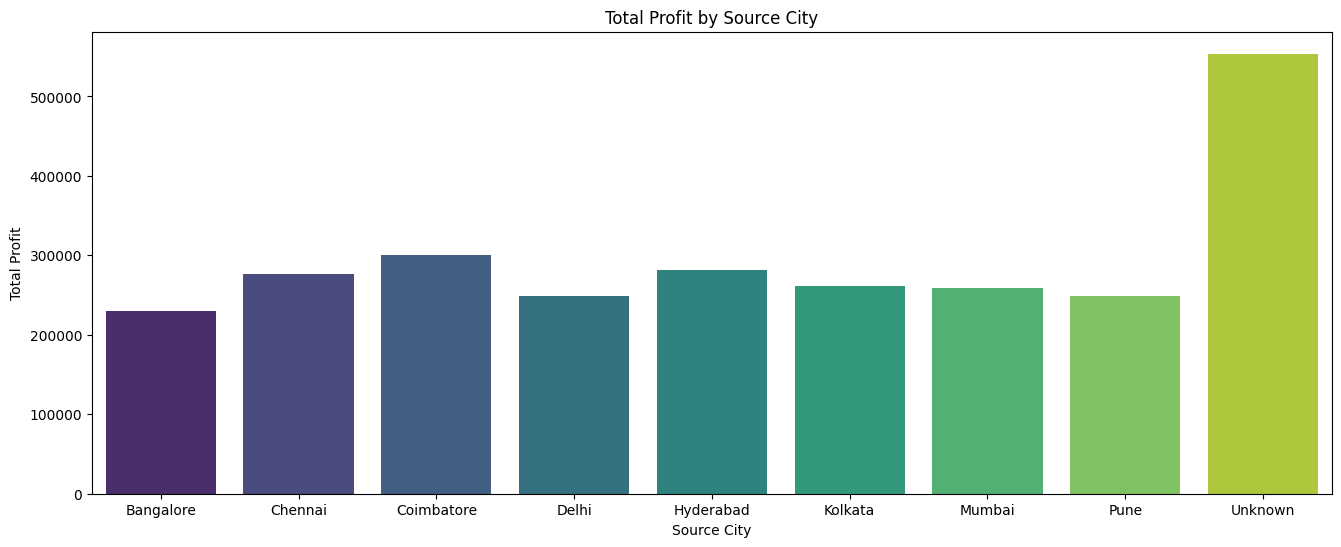

In [29]:
# City Vs Profit
df['Profit'] = df['Selling_Price'] - df['Cost']
city_profit = df.groupby('Source_City')['Profit'].sum().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='Source_City', y='Profit', data=city_profit, palette='viridis')
plt.title('Total Profit by Source City')
plt.xlabel('Source City')
plt.ylabel('Total Profit')
plt.show()